## EDA Google Playstore App

Prepared By: Ejaz-ur-Rehman\
Date: 26-07-2025\
Email ID: ijazfinance@gmail.com

## About Dataset

### Instructions for citation:
If you use this dataset anywhere in your work, kindly cite as the below:
L. Gupta, "Google Play Store Apps," Feb 2019. [Online]. Available: https://www.kaggle.com/lava18/google-play-store-apps

### Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

### Content
Each app (row) has values for catergory, rating, size, and more.

### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## Step-01: Importing Liabraries

In [57]:
# Importing Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**NOTE:** We use **%matplotlib inline** in Jupyter Notebooks to display plots and charts directly below the code cells that produce them. It's a special command called a magic function provided by IPython/Jupyter.

## Step-02: Loading, Exploring and Cleaning the Data Set

## 2.1 Loading the Data Set

In [58]:
# Loading the dataset
df = pd.read_csv("E:/Data Science/EDA_Google_Play_Store_App/googleplaystore.csv/googleplaystore.csv")
# Show first few rows
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
# set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

**NOTE:** Why we hide warnings?

| Reason                       | Explanation                                                                                 |
| ---------------------------- | ------------------------------------------------------------------------------------------- |
| 🔄 **Cleaner Output**        | Warnings can clutter your notebook, especially in loops or large data processing tasks.     |
| 🧪 **Non-critical Warnings** | Many warnings don’t affect the outcome (e.g., deprecated functions, chained assignment).    |
| 🎓 **Teaching/Demos**        | For tutorials or presentations, hiding warnings helps the audience focus on the core logic. |



In [60]:
print(f"Then Name of the Columns in the Data Set are: {df.columns.tolist()}")

Then Name of the Columns in the Data Set are: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [61]:
print(f"The Number of Rows in the Data Set are: {df.shape[0]} and The Number of Columns in the Data Set are: {df.shape[1]}")

The Number of Rows in the Data Set are: 10841 and The Number of Columns in the Data Set are: 13


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### General Data Set Overview:

- Total Records (Rows): 10,841
- Total Features (Columns): 13
- Data Types:
  - object (i.e., text or mixed types): 12 columns
  - float64: 1 column (Rating)

### Column-Wise Observations:

| Column Name        | Non-Null Count | Nulls Present? | Data Type | Observations                                                                     |
| ------------------ | -------------- | -------------- | --------- | -------------------------------------------------------------------------------- |
| **App**            | 10841          | ❌ No           | object    | App names are present for all records.                                           |
| **Category**       | 10841          | ❌ No           | object    | All apps are assigned to a category.                                             |
| **Rating**         | 9367           | ✅ Yes (1,474)  | float64   | About 13.6% of the apps have missing ratings.                                    |
| **Reviews**        | 10841          | ❌ No           | object    | All apps have a review count, but stored as string — may need conversion to int. |
| **Size**           | 10841          | ❌ No           | object    | Contains strings like '19M', 'Varies with device' — needs cleaning.              |
| **Installs**       | 10841          | ❌ No           | object    | Stored as strings like '10,000+' — needs numeric conversion.                     |
| **Type**           | 10840          | ✅ Yes (1)      | object    | Only 1 missing value — can be filled easily.                                     |
| **Price**          | 10841          | ❌ No           | object    | Prices stored as strings — needs cleaning (e.g., remove '\$').                   |
| **Content Rating** | 10840          | ✅ Yes (1)      | object    | Only 1 missing — can be filled easily.                                           |
| **Genres**         | 10841          | ❌ No           | object    | Complete data — might contain multiple genres per app.                           |
| **Last Updated**   | 10841          | ❌ No           | object    | Needs to be converted to datetime for analysis.                                  |
| **Current Ver**    | 10833          | ✅ Yes (8)      | object    | Minimal missing data — can be imputed or removed.                                |
| **Android Ver**    | 10838          | ✅ Yes (3)      | object    | Also minor missing — can be imputed.                                             |



### Key Takeaways:

1. Missing Data:
   - Rating has the most missing values (~13.6%). Needs either imputation or removal depending on the task.
   - Other columns have minimal missing values (1–8 rows), which is negligible and easily manageable.
2. Data Cleaning Required:
   - Several columns (Reviews, Size, Installs, Price) are stored as strings but represent numeric values — they will require preprocessing.
   - Some columns contain symbols (e.g., $, +, M, Varies with device) that need to be stripped for conversion.
3. Potential Feature Engineering:

| **No.** | **Feature Name**      | **Description**                                                                         | **Type**          |
| ------: | --------------------- | --------------------------------------------------------------------------------------- | ----------------- |
|       1 | `Price_Category`      | Categorize app prices: Free, Low (<\$1), Mid (\$1–\$5), High (>\$5)                     | Categorical       |
|       2 | `Size_Category`       | App size bins: Small (<10MB), Medium (10MB–50MB), Large (>50MB)                         | Categorical       |
|       3 | `Popularity_Category` | Based on `Installs`: Low (<10K), Medium, High, Very High (>1M)                          | Categorical       |
|       4 | `Rating_Category`     | Bins for `Rating`: Poor (0–2), Average, Good, Excellent (4.0–5.0)                       | Categorical       |
|       5 | `Reviews_Bucket`      | Number of reviews binned: Very Low to Very High                                         | Categorical       |
|       6 | `Primary_Genre`       | Extract the first genre if multiple are present                                         | Categorical       |
|       7 | `Genre_Count`         | Number of genres listed per app                                                         | Numerical         |
|       8 | `App_Age_Days`        | Days since the app was last updated                                                     | Numerical         |
|       9 | `Is_Compatible`       | Check if `Current Ver` ≥ `Android Ver`                                                  | Boolean           |
|      10 | `Android_Level`       | Group Android versions: Legacy, Standard, Modern                                        | Categorical       |
|      11 | `HighRated_Paid`      | Flag if Paid app with rating ≥ 4.5                                                      | Boolean           |
|      12 | `Monetization_Type`   | Strategy: Free w/Ads, Freemium, Paid Only                                               | Categorical       |
|      13 | `Is_Recently_Updated` | Updated within the past 12 months                                                       | Boolean           |
|      14 | `Top_Developer`       | Developer has >10 apps or high average rating                                           | Boolean           |
|      15 | `Keyword_Present_XYZ` | NLP-based flag for keywords in app name/genre (e.g., "kids", "finance")                 | Multiple Booleans |
|      16 | `Super_Category`      | Group related categories into broader types (e.g., Utility, Leisure)                    | Categorical       |
|      17 | `Discounted_App`      | Flag if app has price > 0 but very high installs (likely discounted/free at some point) | Boolean           |



In [63]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 2.2 Data Preprocessing & Cleaning

### 2.2.1 Preprocessing of Data Feature "Review"

In [65]:
df['Reviews'].value_counts()

Reviews
0           596
1           272
2           214
3           175
4           137
5           108
6            97
7            90
8            74
9            65
10           64
12           60
11           52
13           49
17           48
19           41
14           41
20           35
21           35
16           35
15           31
24           30
25           30
30           30
38           29
18           27
22           26
27           25
23           25
33           24
28           24
26           22
41           22
29           20
32           20
31           19
35           18
39           18
36           17
48           17
37           17
45           17
54           17
44           16
52           15
40           15
64           15
34           14
43           14
53           14
78           13
114          13
66           13
67           13
69           13
55           13
51           12
47           12
88           12
60           12
80           12
42           12


In [66]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [67]:
# Check data type before conversion
print(df['Reviews'].dtype)

# Step 1: Remove any non-numeric values (just in case)
# Sometimes there could be 'NaN' or string values like 'Free', so let's handle that
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Step 2: Verify the data type after conversion
print(df['Reviews'].dtype)

# Step 3: Check for null values introduced by conversion
print(df['Reviews'].isnull().sum())

# (Optional) Drop rows with NaNs in the Reviews column (if desired)
df = df.dropna(subset=['Reviews'])

# Step 4: Confirm it's now numeric
print(df['Reviews'].head())

object
float64
1
0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
Name: Reviews, dtype: float64


In [68]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


**NOTE:** Review column convertd into **float.**

### 2.2.2 Preprocessing of Data Feature "Size"

In [69]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
34M                     63
3.7M                    63
32M                     63
3.9M                    62
3.8M                   

In [70]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- Observation:
  - Varies with device
  - M
  - k
  - convert the column into float

In [71]:
df['Size'].isnull().sum()

np.int64(0)

**NOTE:** No missing values in size

In [72]:
# find the number of unique values in the 'Size' column having 'M' 
df['Size'].loc[df['Size'].str.contains('M', na=False)].value_counts().sum()

np.int64(8829)

In [73]:
# find the number of unique values in the 'Size' column having 'k'
df['Size'].loc[df['Size'].str.contains('k', na=False)].value_counts().sum()

np.int64(316)

In [74]:
# find the number of unique values in the 'Size' column having 'Varies with device'
df['Size'].loc[df['Size'].str.contains('Varies with device', na=False)].value_counts().sum()

np.int64(1695)

In [75]:
8829+316+1695

10840

In [76]:
len(df)

10840

In [77]:
# convert the whole Size column to bytes
def convert_size_to_bytes(Size):
    if 'M' in Size:
        return float(Size.replace('M', '').strip()) * 1024 * 1024  # Convert MB to bytes
    elif 'k' in Size:
        return float(Size.replace('k', '').strip()) * 1024  # Convert KB to bytes
    elif 'Varies with device' in Size:
        return np.nan  # Handle 'Varies with device' as NaN
    else:
        return np.nan  # Handle any other unexpected formats
    
# Apply the conversion function to the Size column
df['Size'] = df['Size'].apply(convert_size_to_bytes)

**NOTE:** Why we converted Size Column to Bytes?

| **Reason**                          | **Explanation**                                                                                                                                                   |
| ----------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✅ **Standardization**               | The `Size` column contains values in **different units** (e.g., `10M`, `500k`, `Varies with device`). Converting everything to **bytes** standardizes the format. |
| 📊 **Numerical Computation**        | To perform **mathematical operations**, comparisons, sorting, or categorization, we need **numeric data**.                                                        |
| 📈 **Visualization**                | Enables consistent plotting in histograms, boxplots, scatter plots, etc.                                                                                          |
| 🔍 **Feature Engineering**          | Helps in creating **bins** like "Small", "Medium", "Large" or computing correlations with other features like rating or installs.                                 |
| ⚙️ **Model Training Compatibility** | Most machine learning models **do not accept string values** like "12M" or "500k". Models require numerical inputs.                                               |
| ❌ **Remove Inconsistencies**        | Strings like `'Varies with device'` need to be **handled or replaced with NaN**, which is easier when we expect **uniform numeric values**.                       |



In [78]:
df.describe()

,Rating,Reviews,Size
count,9366.000000,1.084000e+04,9.145000e+03
mean,4.191757,4.441529e+05,2.256133e+07
std,0.515219,2.927761e+06,2.368637e+07
min,1.000000,0.000000e+00,8.704000e+03
25%,4.000000,3.800000e+01,5.138022e+06
50%,4.300000,2.094000e+03,1.363149e+07
75%,4.500000,5.477550e+04,3.145728e+07
max,5.000000,7.815831e+07,1.048576e+08


In [79]:
# re name the Size column to Size_in_Bytes
df.rename(columns={'Size': 'Size_in_Bytes'}, inplace=True)

In [80]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
# change the size_in_bytes column to Size_in_MB throught lamda function
df['Size_in_MB'] = df['Size_in_Bytes'].apply(lambda x: x/1024 if pd.notnull(x) else x)  # Convert bytes to MB, handling NaN values



In [82]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


**NOTE:** Size column converted into **float** and removed "M", "k" and "Varies with divice" from the size column.

### 2.2.3 Preprocessing of Data Feature "Installs"

In [83]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [84]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [85]:
df['Installs'].isnull().sum()

np.int64(0)

- Obervation:
  - plus sign found in values
  - comma found in values
  - missing values = 0
  - convert the column into integer

In [86]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)  # Remove '+' sign
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)  # Remove ',' sign
df['Installs'] = df['Installs'].fillna('0')  # Fill NaN values with '0'
df['Installs'] = df['Installs'].astype(int)  # Convert to integer

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size_in_Bytes   9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_MB      9145 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.2+ MB


In [88]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

**NOTE:** Installs column converted into **Integer** and remove "+" , " , " from the column.

### 2.2.4 Preprocessing of Data Feature "Price"

In [89]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [90]:
df['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [91]:
# check how many values have the '$' sign
df['Price'].loc[df['Price'].str.contains('\$', na=False)].value_counts().sum()

np.int64(800)

In [92]:
# check the values in the Price column have '$' sign and without '$' sign
df['Price'].loc[
    (df['Price'].str.contains('0')) & (~df['Price'].str.contains(r'\$'))
].value_counts().sum()


np.int64(10040)

### Observation:
- $ sign found in with 800 values. Need to remove it.
- Price column convert into float. 

In [93]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)  # Remove '$' sign

In [94]:
df['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [95]:
# convert the Price column to float
df['Price'] = df['Price'].apply(lambda x: x.replace('Everyone', '0') if 'Everyone' in str(x) else x)  # Replace 'Everyone' with '0'
df['Price'] = df['Price'].astype(float)  # Convert to float


**NOTE:** $ sign removed from the column and converted into **float**.

### Min, Max, Mean Pricing and Descriptive Statistics

In [96]:
# check the min, max, mean, and median of the Price column and print the results too
min_price = df['Price'].min()
max_price = df['Price'].max()   
mean_price = df['Price'].mean()
median_price = df['Price'].median()
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
df.describe()

Minimum Price: 0.0
Maximum Price: 400.0
Mean Price: 1.027368081180812
Median Price: 0.0


,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_MB
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.191757,4.441529e+05,2.256133e+07,1.546434e+07,1.027368,22032.553406
std,0.515219,2.927761e+06,2.368637e+07,8.502936e+07,15.949703,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,102400.000000


## 2.3 Missing Values & It's Treatment

In [97]:
# check the missing values in the DataFrame and sort ascendingly with rounding off to 2 decimal places and show in percentage
df.isnull().sum().sort_values(ascending=True).round(2).apply(lambda x: x / len(df) * 100)

App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Last Updated       0.000000
Genres             0.000000
Content Rating     0.000000
Type               0.009225
Android Ver        0.018450
Current Ver        0.073801
Rating            13.597786
Size_in_Bytes     15.636531
Size_in_MB        15.636531
dtype: float64

In [98]:
# check the total number of missing values in the DataFrame
df.isnull().sum().sum()

np.int64(4875)

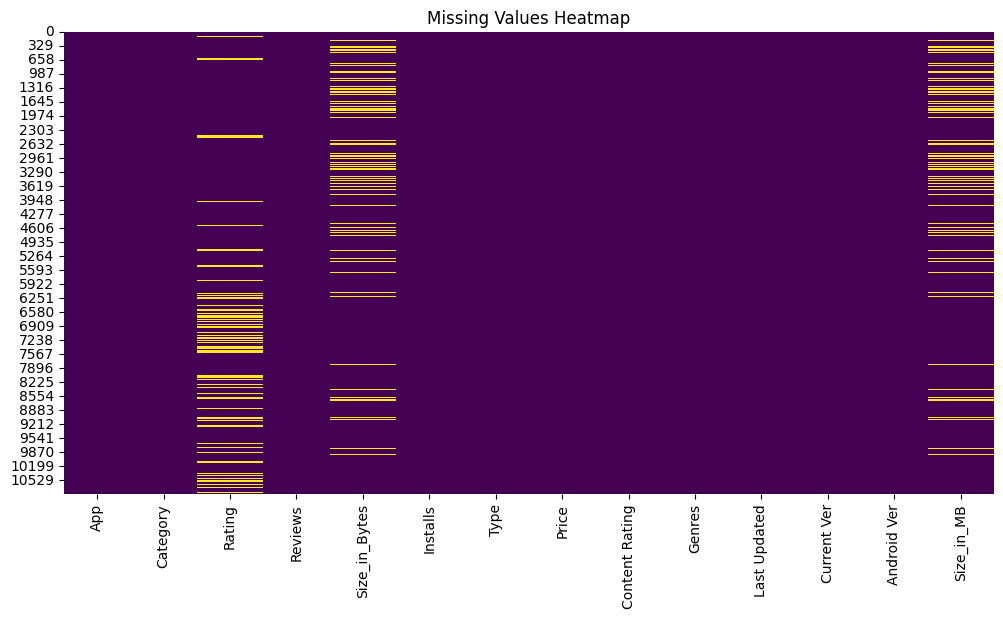

In [99]:
# plot missing values in the DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

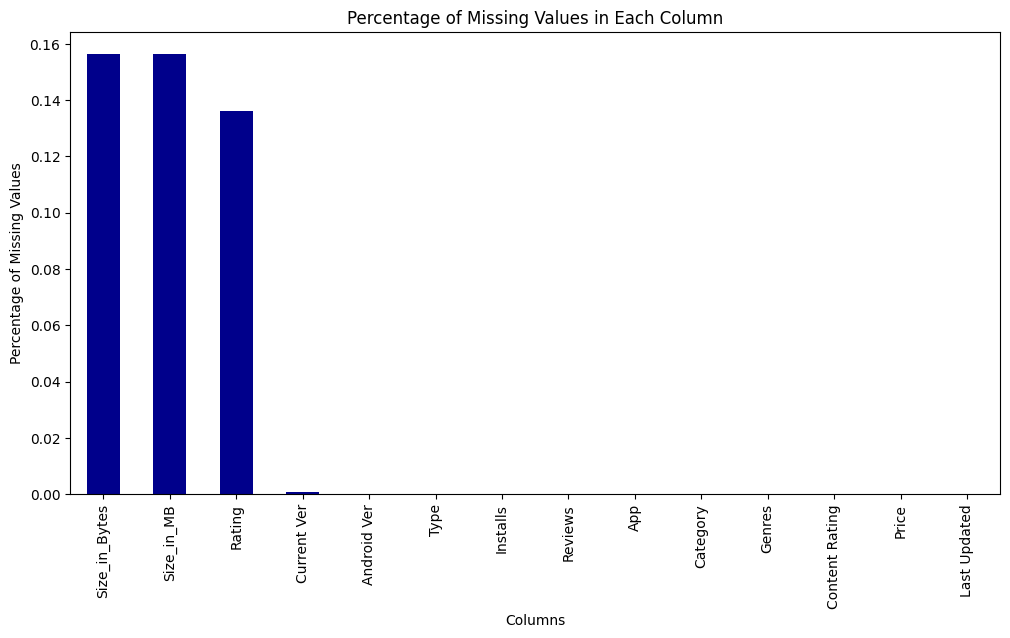

In [100]:
# plot the missing values in the DataFrame with percentage in bar chart
plt.figure(figsize=(12, 6))
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

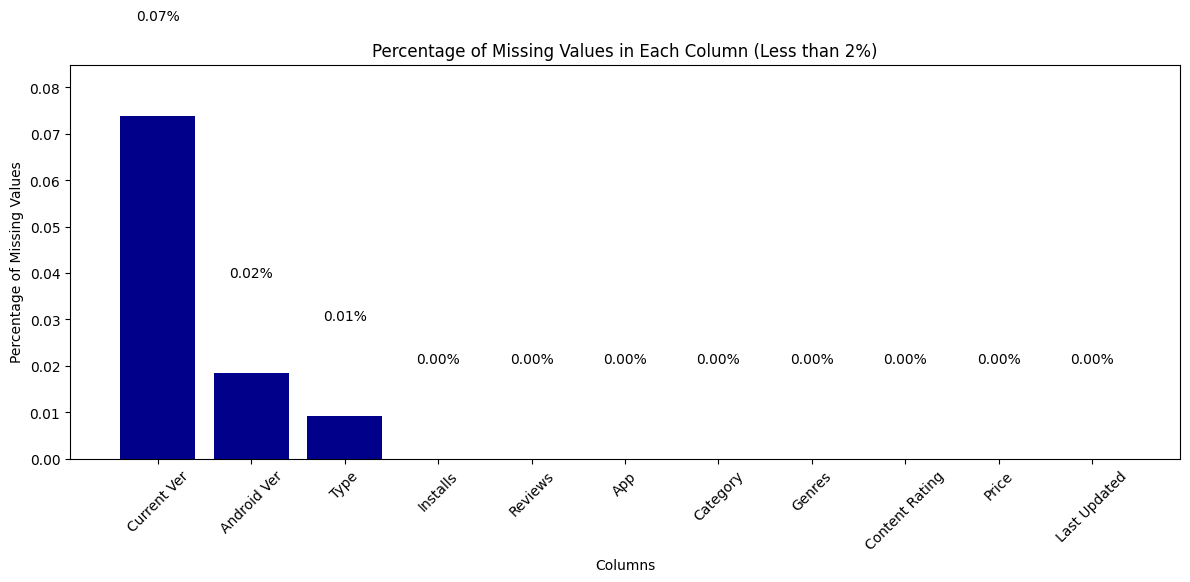

In [101]:
import matplotlib.pyplot as plt

# Calculate missing value percentages
missing = df.isnull().mean().sort_values(ascending=False) * 100

# Filter for columns with less than 2% missing data
missing_filtered = missing[missing < 2]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_filtered.index, missing_filtered.values, color='darkblue')

# Set y-axis limit with padding (10% more than max)
plt.ylim(0, missing_filtered.max() * 1.15)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Percentage of Missing Values in Each Column (Less than 2%)')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 2.3.1 Check Corelation for the Numeric Data

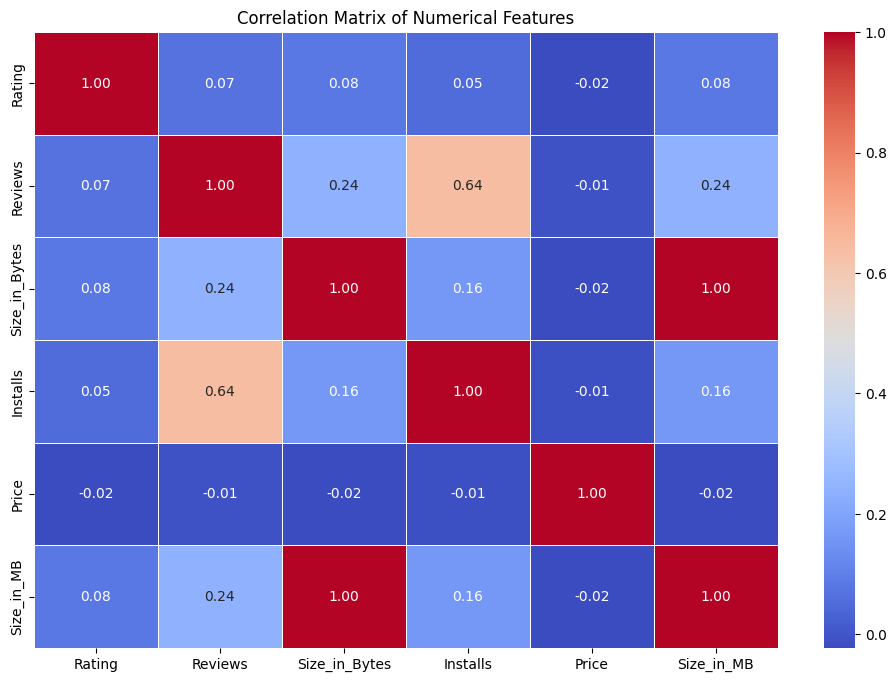

In [102]:
# Correlation Analysis
# 1. Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# 2. Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# 3. Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()




#### Correlation Analysis Summary:
1. Rating vs Other Variables:
   - Rating vs Reviews (0.07): A very weak positive correlation, suggesting that the number of reviews has minimal association with the app's rating. More reviews don’t necessarily mean higher or lower ratings.
   - Rating vs Size_in_Bytes (0.08): Again, a very weak positive correlation. The app's size in bytes doesn’t significantly influence user ratings.
   - Rating vs Installs (0.05): Indicates almost no correlation, showing that app downloads don’t predict user satisfaction (rating).
   - Rating vs Price (-0.02): A very weak negative correlation implies that whether an app is free or paid has negligible impact on its rating.
   - Rating vs Size_in_MB (0.08): Also very weak, aligning with the size_in_bytes correlation.

   **Conclusion:** The Rating appears to be largely independent of other numerical features, implying that user experience (qualitative factors) may have a stronger influence.

2. Strongest Relationships (Between Non-Rating Variables):
   - Reviews vs Installs (0.64): This is the strongest positive correlation in the matrix. It logically follows that apps with more installs tend to have more reviews.
   - Reviews vs Size_in_Bytes / Size_in_MB (0.24): Indicates a moderate positive correlation, possibly because larger apps are feature-rich and generate more feedback.
   - Installs vs Size_in_Bytes / Size_in_MB (0.16): Shows a weak but positive relationship, hinting that app size might be mildly associated with popularity.

   **Conclusion:** Reviews and Installs are the most interlinked features, potentially due to their mutual dependence on app popularity and user engagement.

3. Price Correlation:
   - Price shows negligible correlation with all features:
     - With Reviews (-0.01), Installs (-0.01), Size (-0.02), and Rating (-0.02).
  
   **Conclusion:** This suggests that pricing strategy is not clearly associated with other numerical aspects in this dataset. Many apps may be free or priced similarly, making price a less variable factor.

**Key Takeaways from Correlation Analysis:**
   - Rating is mostly unaffected by numeric factors like installs, size, or price — qualitative reviews, app category, and UI/UX might matter more.
   - Reviews and Installs are key drivers of each other, reinforcing the value of visibility and downloads.
   - Price is not a strong differentiator in this dataset, suggesting a relatively homogenous pricing pattern or user indifference.



### 2.3.2 Calculate Pearson’s r (Reviews vs Installs)

Pearson’s r (Reviews vs Installs): 0.6431
P-value: 0.0000e+00


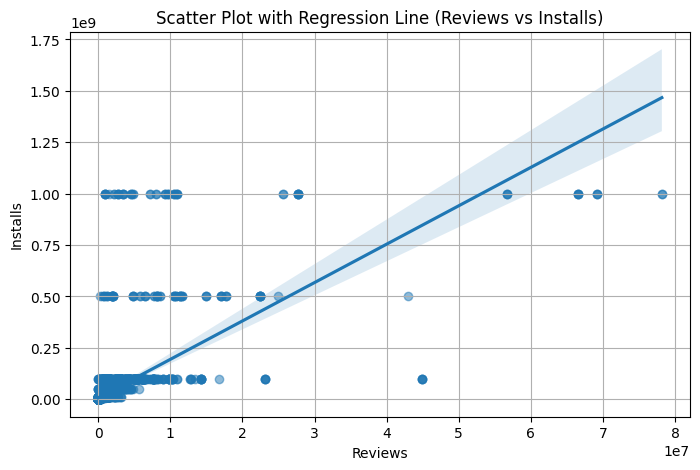

In [103]:
import pandas as pd
from scipy.stats import pearsonr  
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and select only numeric data for correlation
df_clean = df[['Reviews', 'Installs']].dropna()

# Calculate Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(df_clean['Reviews'], df_clean['Installs'])

# Print the result
print(f"Pearson’s r (Reviews vs Installs): {r_value:.4f}")
print(f"P-value: {p_value:.4e}")

# Optional: Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Reviews', y='Installs', data=df_clean, scatter_kws={'alpha':0.5})
plt.title("Scatter Plot with Regression Line (Reviews vs Installs)")
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.grid(True)
plt.show()





### Observation & Interpretation
- Pearson’s r = 0.6431
  - This indicates a moderately strong positive correlation between the number of reviews and the number of installs.
  - In simple terms, as the number of installs increases, the number of reviews also tends to increase — and vice versa.
  - While not a perfect correlation (i.e., not close to 1), the strength is substantial enough to suggest a meaningful relationship.

- P-value = 0.0000
  - The p-value is extremely low (effectively zero), which means the correlation is statistically significant.
  - This implies that the observed correlation is not due to random chance and there is strong evidence of a real relationship between installs and reviews in the population of apps.

### Implications for Analysis
- This insight suggests that Reviews can be a good proxy indicator of app popularity or reach, especially when install data is imprecise or categorized.
- However, since the correlation is not perfect (i.e., r < 0.8), it also suggests other factors (e.g., app quality, user experience, app category, engagement) play a role in how much users interact enough to leave a review.

### 2.3.3 Drop missing values for the columns Type, Android Ver, and Current Ver

In [104]:
# Drop rows where any of the specified columns have missing values
df_cleaned = df.dropna(subset=['Type', 'Android Ver', 'Current Ver'])

# Optional: Check the shape to confirm the drop
print("Shape after dropping missing values:", df_cleaned.shape)

# Optional: Preview the cleaned dataset
df_cleaned[['Type', 'Android Ver', 'Current Ver']].isnull().sum()


Shape after dropping missing values: (10829, 14)


Type           0
Android Ver    0
Current Ver    0
dtype: int64

### 2.3.4 Linear Regression Imputation for Reviews (with plot)

⚠️ No missing 'Reviews' with available 'Installs' to predict.


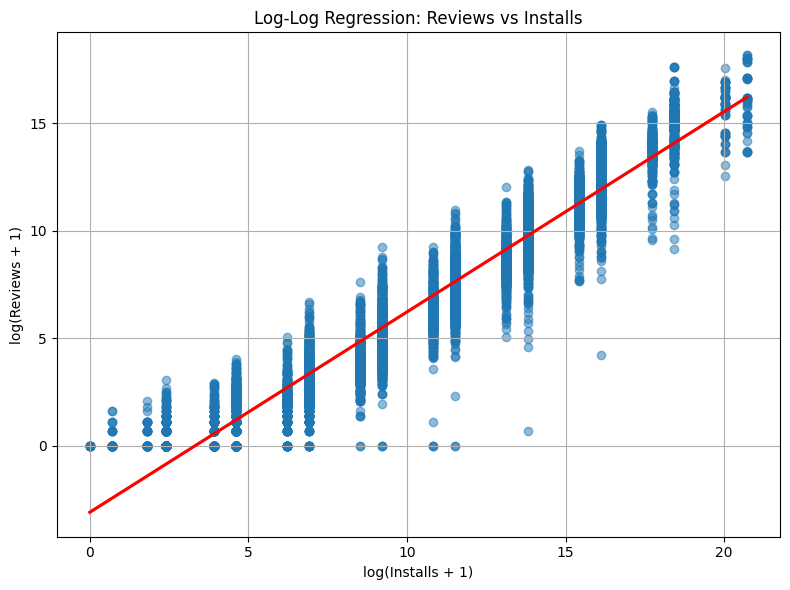

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Ensure Reviews and Installs are numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Step 2: Drop rows where either column is missing (for training)
df_train = df.dropna(subset=['Reviews', 'Installs'])

# Step 3: Transform to log scale to stabilize variance
X = np.log1p(df_train[['Installs']])
y = np.log1p(df_train['Reviews'])

# Step 4: Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 5: Predict Reviews where Reviews is missing but Installs is present
df_missing = df[df['Reviews'].isna() & df['Installs'].notna()]
if not df_missing.empty:
    X_missing = np.log1p(df_missing[['Installs']])
    y_pred_log = model.predict(X_missing)
    y_pred = np.expm1(y_pred_log).round()

    # Step 6: Fill predicted values
    df.loc[df_missing.index, 'Reviews'] = y_pred

    print(f"✅ Filled {len(y_pred)} missing 'Reviews' using Linear Regression.")
else:
    print("⚠️ No missing 'Reviews' with available 'Installs' to predict.")

# Step 7: Visualization of Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=np.log1p(df_train['Installs']), y=np.log1p(df_train['Reviews']),
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Log-Log Regression: Reviews vs Installs')
plt.xlabel('log(Installs + 1)')
plt.ylabel('log(Reviews + 1)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [106]:
df['Installs'].isnull().sum()


np.int64(0)

### 2.3.5 Impute Rating using median

In [108]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Rating'].isnull().sum()

np.int64(0)

### 2.3.6 Impute Size_in_MB using median

In [110]:
df['Size_in_MB'] = df['Size_in_MB'].fillna(df['Size_in_MB'].median())
df['Size_in_MB'].isnull().sum()


np.int64(0)

### 2.3.7 Drop Size_in_Bytes column

In [111]:
# Drop Size_in_Bytes to avoid redundancy
df.drop(columns=['Size_in_Bytes'], inplace=True)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


### 2.3.8 Check Missing Values in teh Dataset

In [112]:
df.isnull().sum().sort_values(ascending=True).round(2).apply(lambda x: x / len(df) * 100)

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Size_in_MB        0.000000
Last Updated      0.000000
Type              0.009225
Android Ver       0.018450
Current Ver       0.073801
dtype: float64